## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import numba

Create Dataset for Timing

In [2]:
timing_dgms = np.empty([10000,7], dtype=object)
for j in range(0,10000):
    three_dgms = []
    six_dgms = []
    ten_dgms = []
    twenty_dgms = []
    forty_dgms = []
    eighty_dgms = []
    threehundred_dgms = []
    point = [0, 20]
    three_dgms.append(point)
    six_dgms.append(point)
    ten_dgms.append(point)
    twenty_dgms.append(point)
    forty_dgms.append(point)
    eighty_dgms.append(point)
    threehundred_dgms.append(point)
    for i in range(0,2):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        three_dgms.append(point)
    for i in range(0,5):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        six_dgms.append(point)
    for i in range(0,9):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        ten_dgms.append(point)
    for i in range(0,19):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        twenty_dgms.append(point)
    for i in range(0,39):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        forty_dgms.append(point)
    for i in range(0,79):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        eighty_dgms.append(point)
    for i in range(0,299):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        threehundred_dgms.append(point)
    timing_dgms[j,0]=three_dgms
    timing_dgms[j,1]=six_dgms
    timing_dgms[j,2]=ten_dgms
    timing_dgms[j,3]=twenty_dgms
    timing_dgms[j,4]=forty_dgms
    timing_dgms[j,5]=eighty_dgms
    timing_dgms[j,6]=threehundred_dgms
timing_dgms = pd.DataFrame(timing_dgms)
timing_dgms.columns = ['Length 3 dgms', 'Length 6 dgms', 'Length 10 dgms', 'Length 20 dgms', 'Length 40 dgms', 'Length 80 dgms', 'Length 300 dgms']
timing_dgms

,Length 3 dgms,Length 6 dgms,Length 10 dgms,Length 20 dgms,Length 40 dgms,Length 80 dgms,Length 300 dgms
0,"[[0, 20], [11, 19], [10, 14]]","[[0, 20], [3, 5], [6, 16], [0, 9], [16, 17], [...","[[0, 20], [14, 17], [12, 12], [8, 9], [13, 16]...","[[0, 20], [0, 14], [10, 12], [15, 17], [0, 17]...","[[0, 20], [7, 10], [6, 11], [7, 10], [8, 10], ...","[[0, 20], [2, 3], [3, 7], [17, 18], [4, 13], [...","[[0, 20], [6, 8], [4, 4], [14, 14], [5, 18], [..."
1,"[[0, 20], [13, 15], [7, 9]]","[[0, 20], [18, 19], [0, 17], [10, 16], [8, 15]...","[[0, 20], [1, 16], [3, 12], [9, 11], [3, 4], [...","[[0, 20], [10, 13], [8, 17], [6, 6], [16, 18],...","[[0, 20], [15, 15], [3, 4], [15, 17], [3, 13],...","[[0, 20], [5, 10], [15, 18], [8, 13], [10, 16]...","[[0, 20], [14, 16], [4, 8], [16, 17], [9, 15],..."
2,"[[0, 20], [18, 19], [11, 12]]","[[0, 20], [1, 9], [17, 17], [17, 19], [3, 15],...","[[0, 20], [9, 13], [13, 13], [2, 16], [10, 12]...","[[0, 20], [8, 11], [0, 15], [1, 6], [10, 14], ...","[[0, 20], [0, 1], [12, 14], [1, 17], [1, 17], ...","[[0, 20], [17, 18], [0, 14], [1, 16], [1, 8], ...","[[0, 20], [0, 8], [19, 19], [8, 10], [7, 14], ..."
3,"[[0, 20], [18, 18], [1, 17]]","[[0, 20], [8, 14], [4, 4], [11, 11], [19, 19],...","[[0, 20], [18, 18], [13, 16], [6, 9], [6, 19],...","[[0, 20], [17, 19], [15, 15], [10, 15], [1, 16...","[[0, 20], [2, 17], [13, 13], [8, 13], [11, 17]...","[[0, 20], [14, 17], [8, 10], [19, 19], [17, 19...","[[0, 20], [6, 19], [16, 18], [7, 18], [0, 13],..."
4,"[[0, 20], [8, 14], [3, 17]]","[[0, 20], [15, 16], [15, 15], [6, 10], [12, 15...","[[0, 20], [9, 9], [13, 13], [5, 14], [14, 19],...","[[0, 20], [19, 19], [14, 18], [4, 7], [7, 9], ...","[[0, 20], [0, 3], [7, 12], [18, 19], [14, 17],...","[[0, 20], [0, 5], [11, 15], [2, 18], [15, 15],...","[[0, 20], [9, 18], [15, 15], [2, 16], [19, 19]..."
...,...,...,...,...,...,...,...
9995,"[[0, 20], [2, 13], [13, 13]]","[[0, 20], [15, 18], [14, 18], [0, 15], [16, 19...","[[0, 20], [18, 19], [9, 11], [6, 16], [17, 18]...","[[0, 20], [10, 10], [19, 19], [12, 15], [14, 1...","[[0, 20], [15, 15], [5, 13], [15, 15], [18, 18...","[[0, 20], [9, 12], [6, 15], [8, 15], [17, 18],...","[[0, 20], [5, 9], [11, 11], [0, 1], [5, 10], [..."
9996,"[[0, 20], [16, 17], [12, 17]]","[[0, 20], [15, 19], [18, 19], [13, 15], [7, 12...","[[0, 20], [0, 5], [11, 19], [11, 15], [9, 18],...","[[0, 20], [18, 18], [10, 14], [4, 13], [8, 14]...","[[0, 20], [17, 18], [19, 19], [15, 16], [6, 8]...","[[0, 20], [6, 19], [2, 5], [3, 14], [18, 19], ...","[[0, 20], [9, 19], [8, 18], [10, 10], [17, 18]..."
9997,"[[0, 20], [8, 11], [4, 18]]","[[0, 20], [12, 19], [10, 16], [2, 11], [7, 12]...","[[0, 20], [9, 10], [8, 9], [3, 10], [1, 12], [...","[[0, 20], [16, 18], [4, 12], [12, 16], [17, 18...","[[0, 20], [12, 16], [19, 19], [6, 10], [11, 14...","[[0, 20], [13, 17], [11, 18], [5, 17], [14, 18...","[[0, 20], [11, 17], [10, 13], [15, 15], [13, 1..."
9998,"[[0, 20], [8, 15], [3, 11]]","[[0, 20], [16, 19], [6, 16], [5, 13], [4, 14],...","[[0, 20], [3, 10], [7, 12], [2, 8], [18, 18], ...","[[0, 20], [4, 7], [10, 18], [16, 19], [15, 16]...","[[0, 20], [14, 17], [7, 15], [12, 12], [5, 16]...","[[0, 20], [10, 15], [10, 14], [10, 13], [19, 1...","[[0, 20], [7, 15], [15, 19], [7, 8], [7, 10], ..."


In [3]:
dgms_3 = timing_dgms['Length 3 dgms']
dgms_6 = timing_dgms['Length 6 dgms']
dgms_10 = timing_dgms['Length 10 dgms']
dgms_20 = timing_dgms['Length 20 dgms']
dgms_40 = timing_dgms['Length 40 dgms']
dgms_80 = timing_dgms['Length 80 dgms']
dgms_300 = timing_dgms['Length 300 dgms']

### Load original kernel method function from teaspoon

In [4]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi

def KernelMethod(perDgm1, perDgm2, sigma):
    
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(math.pow(dist1, 2))/(8*sigma)) - \
                    np.exp(-(math.pow(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

def heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(KernelMethod(dgm0, dgm0, sigma) + KernelMethod(dgm1, dgm1, sigma) - 2*KernelMethod(dgm0, dgm1, sigma))

def kernel_features(train, s, distance=True):
    import time
    import numpy as np
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))

    for i in range(0,n_train):
        for j in range(0,i):
            dgm0 = train[i]
            dgm1 = train[j]
            if distance==True:
                hka = heat_kernel_distance(dgm0, dgm1, sigma = s) 
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka
            else:
                hka = KernelMethod(dgm0, dgm1, sigma=s)
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka

    return X_train_features

Optimized with Numba

In [5]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi
from numba import jit
import time

@jit(nopython=True)
def optimizedKernelMethod(perDgm1, perDgm2, sigma):
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(np.power(dist1, 2))/(8*sigma)) - \
                np.exp(-(np.power(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

@jit(nopython=True)
def optimized_heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(optimizedKernelMethod(dgm0, dgm0, sigma) + optimizedKernelMethod(dgm1, dgm1, sigma) - 2*optimizedKernelMethod(dgm0, dgm1, sigma))

@jit(nopython=True, parallel=True)
def parallel_optimized_kernel_features(train, num_dgms, s, distance=True):
    X_train_features = np.zeros((num_dgms, num_dgms))
    
    for i in range(0,num_dgms):
        for j in range(0,i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            if distance==True:
                hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka
            else:
                hka = optimizedKernelMethod(dgm0, dgm1, sigma = s) 
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka

    return X_train_features

@jit(nopython=True)
def optimized_kernel_features(train, num_dgms, s, distance=True):
    X_train_features = np.zeros((num_dgms, num_dgms))
    
    for i in range(0,num_dgms):
        for j in range(0,i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            if distance==True:
                hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka
            else:
                hka = optimizedKernelMethod(dgm0,dgm1,sigma=s)
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka

    return X_train_features

In [6]:
@jit
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([], dtype='float')
    num_dgms = len(dgm)
    for i in range(0,num_dgms):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    dummy = np.zeros((num_dgms))
    dgm_reshape = np.array(dgm_reshape, dtype='float')
    return dgm_reshape, num_dgms, dummy

/var/folders/3v/dt2bhl_176dcpzjx5gld8qdc0000gn/T/ipykernel_4361/1226298417.py:2: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def reshape_persistence_diagrams(dgm):


guvectorize

In [7]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='cpu', nopython=True)
def guvectorize_kernel(train, num_dgms, s, result):
    n_train = len(num_dgms)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            kSigma0 = kSigma0/(8 * np.pi * sigma)
            result[i,j] = kSigma0
            result[j,i] = kSigma0

guvectorize no distance

In [8]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='cpu', nopython=True)
def guvectorize_kernel_distance(train, num_dgms, s, result):
    n_train = len(num_dgms)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [15]:
dgms = np.array(dgms_3[0:5])
print(kernel_features(dgms, s=.3, distance=False))
dgms, r, d = reshape_persistence_diagrams(dgms)
optimized_kernel_features(dgms, r, s=.3)
parallel_optimized_kernel_features(dgms, r, s=.3)
print(guvectorize_kernel(dgms, d, .3))
guvectorize_kernel_distance(dgms, d, .3)
#optimizedKernelMethod(dgm1, dgm2, sigma=.3)

[[0.         0.13471474 0.14855424 0.13468538 0.15775297]
 [0.13471474 0.         0.1331102  0.13468538 0.13270771]
 [0.14855424 0.1331102  0.         0.13468538 0.13328763]
 [0.13468538 0.13468538 0.13468538 0.         0.15980914]
 [0.15775297 0.13270771 0.13328763 0.15980914 0.        ]]
[[0.         0.38842454 0.2826066  0.26937076 0.39803425]
 [0.38842454 0.         0.2826066  0.26937076 0.39803425]
 [0.2826066  0.2826066  0.         0.26937076 0.39803425]
 [0.26937076 0.26937076 0.26937076 0.         0.39803425]
 [0.39803425 0.39803425 0.39803425 0.39803425 0.        ]]


array([[0.        , 0.71894884, 0.61918536, 0.63078711, 0.69312386],
       [0.71894884, 0.        , 0.63624739, 0.62323714, 0.72183334],
       [0.61918536, 0.63624739, 0.        , 0.53160756, 0.64347928],
       [0.63078711, 0.62323714, 0.53160756, 0.        , 0.58973446],
       [0.69312386, 0.72183334, 0.64347928, 0.58973446, 0.        ]])

guvectorize

First run to compile

In [11]:
train_test = np.array(dgms_10[0:3])
%timeit X_train_features_original = kernel_features(train_test, s = .3)
train, dummy_train, dummy = reshape_persistence_diagrams(train_test)
%timeit X_train_features_optimized = optimized_kernel_features(train, dummy_train, s = .3)
%timeit X_train_features_optimized_parallel = parallel_optimized_kernel_features(train, dummy_train, .3)
%timeit X_train_features_gu = guvectorize_kernel(train, dummy, .3)
%timeit X_train_features_gu = guvectorize_kernel_parallel(train, dummy, .3)

15 ms ± 45.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
936 µs ± 2.77 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.52 ms ± 27.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
19.3 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
32.4 µs ± 816 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Loop for random samples and timing

In [19]:
seed = [0,1,2,3,4]
train_size = [25, 50, 75, 100]
n = len(train_size)
timing10 = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_10[0:train_size[i]])
        timing10[i,0] += len(dgms)

        start = time.time()
        X_train_features = kernel_features(dgms, s = .3)
        end = time.time()-start
        timing10[i,1] +=end
        print("Finished Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features = optimized_kernel_features(train, dummy_train, s = .3)
        end = time.time()-start
        timing10[i,2] +=end
        print("Finished Jit Optimized Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        result1 = parallel_optimized_kernel_features(train, dummy_train, .3)
        end = time.time()-start
        timing10[i,3] +=end
        print("Finished Jit Optimized and Parallel Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel_distance(train, dummy, .3)
        end = time.time()-start
        timing10[i,4] +=end
        print("Finished gu vectorize")

    print("Finished Training ", i)
timing10 = pd.DataFrame(timing10/5)
timing10.columns=['Observations', 'Original', 'Jit optimized', 'Jit optimized, parallel', 'Vectorized']
print(timing10)

Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Training  0
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Fi

Plot Timing

Text(0.5, 1.0, 'Kernel Method Timing - 10 dgms')

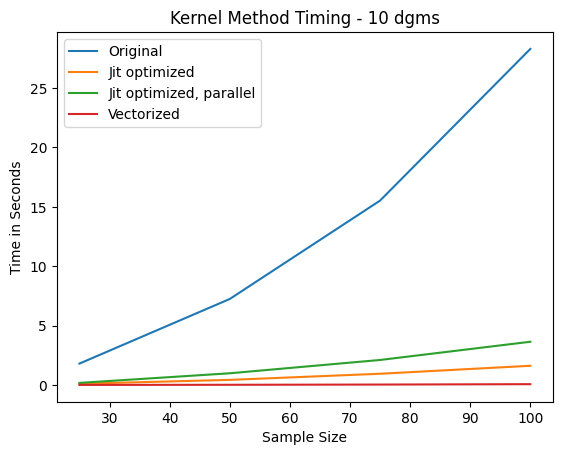

In [20]:
t = timing10.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 10 dgms")

Text(0.5, 1.0, 'Kernel Method Timing - 10 dgms')

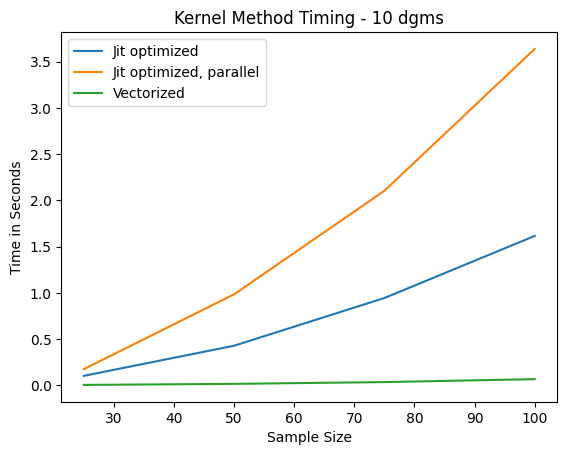

In [22]:
#timing.columns=['Observations', 'Original', 'Jit optimized', 'Vectorized', 'None']
timing_noog = timing10.drop(['Original'], axis=1)
t = timing_noog.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 10 dgms")

### Timing with 80 dgms

In [16]:
seed = [0,1,2,3,4]
train_size = [10, 20, 30, 40, 50]
n = len(train_size)
timing_80 = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_80[0:train_size[i]])
        timing_80[i,0] += len(dgms)

        start = time.time()
        X_train_features = kernel_features(dgms, s = .3)
        end = time.time()-start
        timing_80[i,1] +=end
        print("Finished Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features = optimized_kernel_features(train, dummy_train, s = .3)
        end = time.time()-start
        timing_80[i,2] +=end
        print("Finished Jit Optimized Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        result1 = parallel_optimized_kernel_features(train, dummy_train, .3)
        end = time.time()-start
        timing_80[i,3] +=end
        print("Finished Jit Optimized and Parallel Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel_distance(train, dummy, .3)
        end = time.time()-start
        timing_80[i,4] +=end
        print("Finished gu vectorize")


    print("Finished Training ", i)
timing_80 = pd.DataFrame(timing_80/5)
timing_80.columns=['Observations', 'Original', 'Jit optimized', 'Jit optimized, parallel', 'Vectorized']
print(timing_80)

Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Training  0


KeyboardInterrupt: 

Text(0.5, 1.0, 'Kernel Method Timing - 80 dgms')

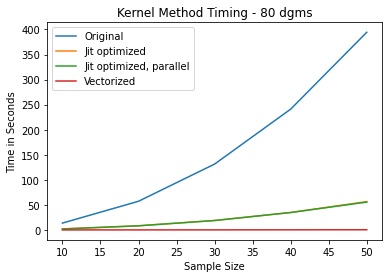

In [20]:
t = timing_80.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 80 dgms")

Text(0.5, 1.0, 'Kernel Method Timing - 80 dgms')

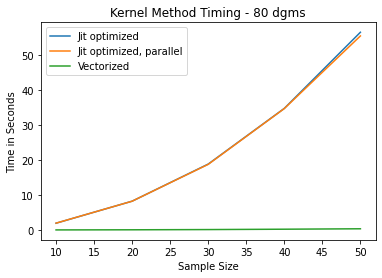

In [21]:
timingnoog = timing_80.drop(['Original'], axis=1)
t = timingnoog.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 80 dgms")

In [22]:
seed = [0,1,2,3,4]
train_size = [100, 200, 300, 400, 500, 600, 700]
n = len(train_size)
timing_300_vec = np.zeros((n,2))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_300[0:train_size[i]])
        timing_300_vec[i,0] += len(dgms)

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_300_vec[i,1] +=end
        print("Finished gu vectorize")

    print("Finished Training ", i)
timing_300_vec = pd.DataFrame(timing_300_vec/5)
timing_300_vec.columns=['Observations','Vectorized']
print(timing_300_vec)

Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  0
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  1
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  2
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  3
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  4
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  5


Text(0.5, 1.0, 'Vectorized - 300 dgms')

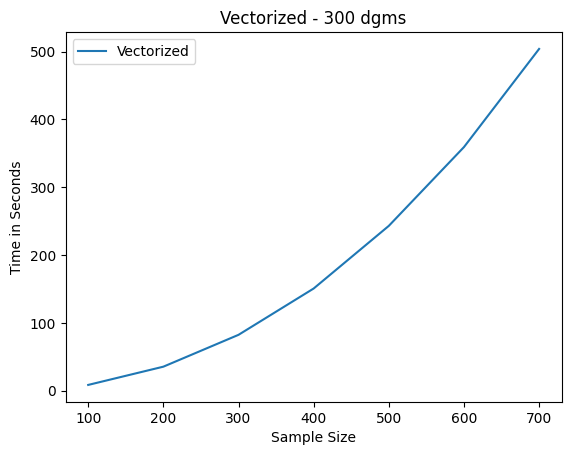

In [ ]:
t = timing_300_vec.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Vectorized - 300 dgms")

In [ ]:
seed = [0,1,2,3,4]
train_size = [100, 200, 300, 400, 500, 600, 700]
n = len(train_size)
timing_var_vec = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_10[0:train_size[i]])
        timing_var_vec[i,0] += len(dgms)

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,1] +=end
        print("Finished 10 dgms")

        dgms = np.array(dgms_20[0:train_size[i]])
        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,2] +=end
        print("Finished 20 dgms")

        dgms = np.array(dgms_40[0:train_size[i]])
        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,3] +=end
        print("Finished 20 dgms")

    print("Finished Training ", i)
timing_var_vec = pd.DataFrame(timing_var_vec/5)
timing_var_vec.columns=['Observations','10 dgms', '20 dgms', '30 dgms']
print(timing_var_vec)

Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  0
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  1
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  2
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Fi

Text(0.5, 1.0, 'Vectorized - Variable dgms size')

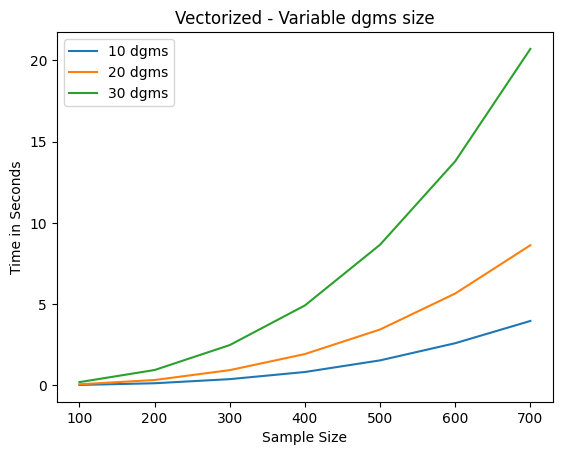

In [ ]:
t = timing_var_vec.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Vectorized - Variable dgms size")